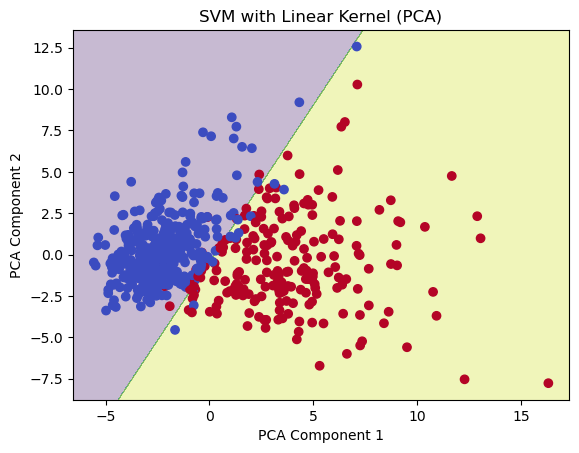

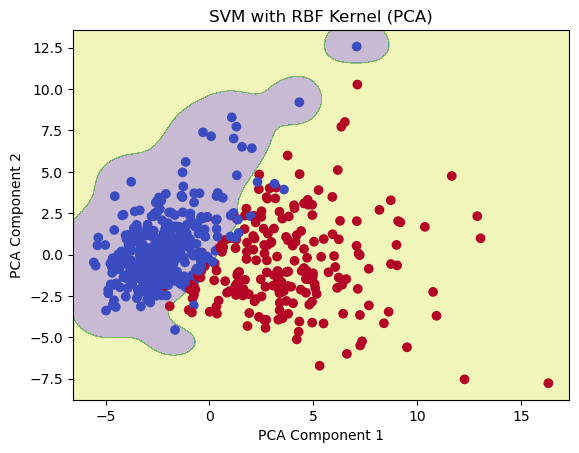

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Mean CV Accuracy: 0.9789318428815401


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("breast-cancer.csv") 
df.drop(columns=['id'], inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split for training/visualization
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVMs
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train, y_train)

# Plot function
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Visualize
plot_decision_boundary(svm_linear, X_pca, y, "SVM with Linear Kernel (PCA)")
plot_decision_boundary(svm_rbf, X_pca, y, "SVM with RBF Kernel (PCA)")

# Hyperparameter Tuning with GridSearchCV 
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_full, y_train_full)

print("Best Parameters:", grid.best_params_)

# Evaluate Best Model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_full)
print("Classification Report:\n", classification_report(y_test_full, y_pred))

# Cross-validation score
cv_score = cross_val_score(best_model, X_scaled, y, cv=5)
print("Mean CV Accuracy:", cv_score.mean())
